# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

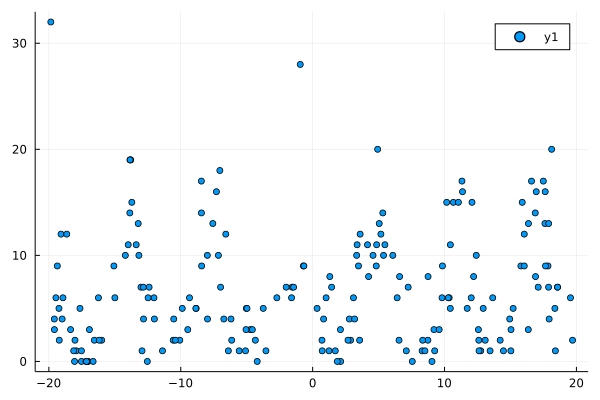

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:03
  iter:  20
  ELBO:  -615.8080360566817
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.917182 seconds (7.03 M allocations: 447.521 MiB, 1.70% gc time, 98.31% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.3029096566911071, 0.33890384367214166, 0.25839881833586964, 0.328955623916695, 0.4264504027457108, 0.4494928904612628, 0.23261086960485483, 0.20274388463412676, 0.37586205025230135, 0.4507234547492388  …  0.3740799056736789, 0.1955859354449164, 0.47231989663173896, 0.2633797764697749, 0.40811954634939934, 0.1708086905721444, 0.6019064606443175, 0.19007552088119595, 0.38751260006438354, 0.4437161801922023], θ = [7.443174924805545, 5.943224107463937, 4.972363700558878, 7.433091558578484, 3.4479047156105596, 9.834963773225077, 3.4843034784582017, 6.477825889247761, 5.930347688451684, 7.375557685494322  …  5.930997542716632, 3.987297304451415, 2.945445198106065, 3.977036314545941, 4.438562523146492, 5.486666745209993, 2.427160409655702, 8.474500955703618, 5.432191974073554, 8.85518742536884]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -712.8592495726914
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.624888 seconds (4.44 M allocations: 311.923 MiB, 4.56% gc time, 97.21% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.87891782550835) infered by Analytic Variational Inference , (local_vars = (c = [0.16489437919716643, 0.21619590310487177, 0.16443932390550847, 0.20733149580971466, 0.661683428307541, 0.3554259519366127, 0.41291915730730283, 0.2776514099345832, 0.25324821579132617, 0.35434930121864877  …  0.5823603199285067, 0.3483656178070866, 0.6992632336930114, 0.46324049261148054, 0.6252393862083458, 0.2181545097504702, 0.7914202202778836, 0.2004677272628143, 0.5912836820904558, 0.35299825923314326], θ = [8.502329205951701, 6.955390157521579, 6.209405266263286, 8.506973564817375, 5.653363065163359, 10.499956204526756, 5.312633145736641, 8.044563990946093, 6.827908158432974, 8.027523922443477  …  7.95569459218324, 5.714942428684674, 5.204614984098024, 5.897120081285196, 6.552901954457552, 6.991442632885046, 4.827172229437717, 9.916310348892939, 7.499506719052064, 9.502638500032045], γ = [7.043170905937398, 6.964921416891294, 7.4467819501

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

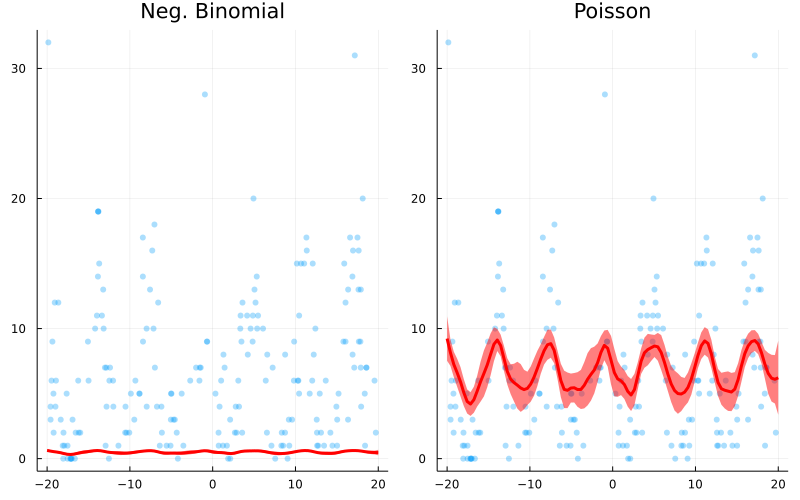

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*